#**Multivariate Logistic Regression with sci-kit learn**
 
In this notebook, we use logistic regression as a binary classifier (1/0). Before training the logistic regression model, we preprocess the data by doing normalization. since all the values are numerical, we don't net to hot encoding categorical data. <br> <br>
In the last section, we also try to apply L1 & L2 regularization in our model and compare the result with the previous one (without regularization)


##**I. Preparing The Dataset**



###**A. Importing the Dataset**

In this case, we use a diabetes dataset downloaded from [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

However, since we use google colab, importing from kaggle is a bit burdensome. So, instead of importing directly from kaggle, we import the data [here](https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv) from github which was uploaded by rrichajalota. This .csv data can be easily read by pandas.

Finally, conver the data type from pandas dataframe to numpy array because we will use numpy function later.

In [ ]:
# importing the dataset
import numpy as np
import pandas as pd
url = 'https://raw.githubusercontent.com/rrichajalota/Pima-Indians-Diabetes-kaggle/master/diabetes.csv'
dataset = pd.read_csv(url)

# there are 8 features in the dataset
X = dataset.iloc[:, :8]
Y = dataset.iloc[:, 8]
X = X.to_numpy()
Y = Y.to_numpy()

###**B. Normalization**

Normalization is the process of adjusting values of various features with various scale and range so that every features have common scale and range.

Normalization is useful to prevent one feature dominating the other feature

For example, imagine we have 3 features to classify whether a house is worth to buy or not: 
1. The area (ranging from 10 $m^2$ to 150 $m^2$
2. The distance to city center (ranging from 0 km to 20 km)
3. The price (ranging from Rp. 700.000.000 to Rp. 5.000.000.000)

Notice that the value of price is much bigger than the other value. This will raise some problem in the training step since the price feature is dominating the other features in the beginning of the training.

<br>
So, that's why we use normalization.

There are several methods for normalization, but the 2 most common method are standardization and min max scaling.<br>

For more information regarding normalization, please read [this](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02) article.

####**1. Min-Max Scaling**
also known as Min-Max Normalization. This is the simplest normalization technique. The normalized value will be between 0 and 1 [0,1].
<br>

**For each feature/column**, we update each value/row by using this formula:

$x' = \frac{x - min(x)}{max(x) - min(x)}$

where: <br>
$x'$ = new scaled value <br>
$x$ = old value <br>
$min(x)$ = smallest value of a feature/column in the dataset <br>
$max(x)$ = biggest value of a feature/column in the dataset <br>

In [ ]:
# manual min-max scaling
# reference: https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
def minMaxScale(dataset):
    
    #find the minimum and maximum value for each column/fetaure
    minimum = list()
    maximum = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        minimum.append( min(col_values) )
        maximum.append( max(col_values) )
    
    #update the value for each column, according to the min max scaling formula
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minimum[i]) / (maximum[i] - minimum[i])
    
    return dataset
  
X = minMaxScale(X)

We can also use min max scaling using scikit library

In [ ]:
# min-max scaling using scikit library
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

####**2. Standardization**
also known as Standard Scaling / Z-norm Normalization. In this method, the mean / average value of each column / feature will be zero (or approaching 0) and the standard deviation will be 1 (or approaching 1). Simply said, the data will follow the normal distribution N(0,1). This method is arguably the best method for most dataset.
<br>

**For each feature/column**, we update each value/row by using this formula:

$z = \frac{x - \mu}{\sigma }$

where: <br>
$z$ = new scaled value <br>
$x$ = old value <br>
$\mu$ = average value of a feature/column in the dataset <br>
$\sigma$ = standard deviation value of a feature/column in the dataset <br>

In [ ]:
# manual standardization
# reference: https://machinelearningmastery.com/scale-machine-learning-data-scratch-python/
def standardize(dataset):
    
    #find the mean/average value of each column/feature
    from math import sqrt
    means = [0 for i in range(len(dataset[0]))]
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        means[i] = sum(col_values) / float(len(dataset))
    
    #find the standard deviation value of each column/feature
    stdevs = [0 for i in range(len(dataset[0]))]
    for i in range(len(dataset[0])):
        variance = [pow(row[i]-means[i], 2) for row in dataset]
        stdevs[i] = sum(variance)
    stdevs = [sqrt(x/(float(len(dataset)-1))) for x in stdevs]
    
    #uptdate the value for each column, according to the standardization formula
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - means[i]) / stdevs[i]
    
    return dataset

X = standardize(X)

We can also use standardizer using scikit library

In [ ]:
# standardization using scikit library   
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)

###**C. Splitting The Dataset**

Next, we split the data into training set and test set.<br>

In this case we split the dataset into 20% test set and 80% train set. We can use scikit library to simplify this process.
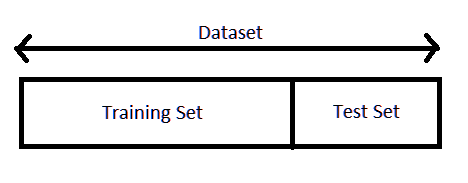

In [ ]:
# spliting the data using scikit library
from sklearn.model_selection import train_test_split
# set the random_state to 0 to make the split consistant every runtime
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, random_state = 0)

Now, our dataset is ready to be used for our model. Here is the preview of our dataset.

In [ ]:
print(X_train[:5])
print(Y_train[:5])
print(X_test[:5])
print(Y_test[:5])

[[ 0.93691372  0.91091809  0.45982725  0.53090156  0.40115431  0.40708356
   0.66479969  1.76634642]
 [ 0.04601433 -0.74783062 -0.47073225  0.15453319 -0.69289057 -0.48135115
  -0.08720986 -0.95646168]
 [-1.14185152  1.38037527  1.08020025  0.7818138   5.21147866  2.57740266
  -0.13553176 -0.87137393]
 [-0.84488505 -0.37226487 -0.67752325  0.02907707  0.47930038 -0.86210889
   1.09063642 -0.87137393]
 [ 1.23388019 -0.02799627 -3.57259724 -1.28821221 -0.69289057 -0.25289651
  -0.87244072  0.40494237]]
[1 0 0 0 1]
[[-0.84488505  2.44447821  0.35643175  1.40909441 -0.69289057  1.38436175
   2.784923   -0.95646168]
 [-0.54791859 -0.43485916  0.25303625  0.59362962  0.17539902  0.20401277
  -0.20499449 -0.87137393]
 [ 0.04601433 -1.40507067 -0.36733675 -1.28821221 -0.69289057  0.25478047
  -0.24425603 -0.70119842]
 [ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]
 [-1.14185152 -0.30967058 -0.2122435  -1.28821221 -0.69289057 -0.93826044
   0

##**II. Training The Model**

*note: In this discussion, we use the normalized dataset using standardization* <br><br>
Logistic regression is developed from linear regression. The goal of logistic regression is to classify, while the goal of linear regression is to predict a value.

It's explained clearly in [this](https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148) article.

In summary: <br>
we have a hypothesis function/ probability function

$h_\theta (X) = \frac{1}{1+ e^{-(\beta_0- \beta_1X)}}$

where: <br>
$\beta_0$ = matrix of bias <br>
$\beta_1$ = matrix of weight/parameter for each features <br>
$X$ = matrix of features <br>

we also have a cost function

$Cost(h_\theta(X), Y )
\left\{\begin{matrix}
-log(h_\theta(X)) & y =1\\ 
-log(1-h_\theta(X)) &  y = 0 
\end{matrix}\right.$

And our goal is minimizing the cost function

We can use scikit library to make & train our model

In this step, make sure not to apply regularization since we want to compare with using regularization later.

Read more information about scikit's LogisticRegression [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)


In [ ]:
from sklearn.linear_model import LogisticRegression

# set penalty = None to disable the regularization
classifier = LogisticRegression(penalty = 'none', solver = "lbfgs")
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

##**III. Result and Evaluation**

###**A. Result**
After the model is trained on the training dataset, now let's predict the test dataset.


In [ ]:
Y_pred = classifier.predict(X_test)

###**B. Evaluation**

Prepare the library

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

####**1. Confusion Matrix**

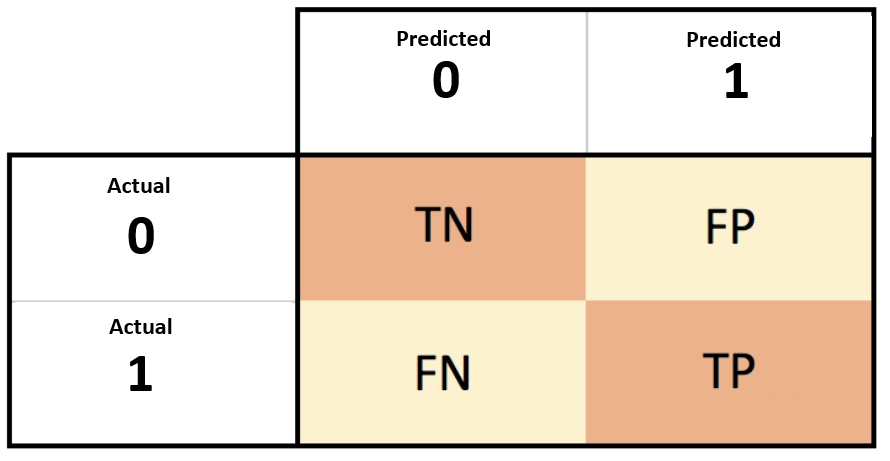

In [ ]:
cm = confusion_matrix(Y_test,Y_pred)
print(cm)

[[98  9]
 [18 29]]


So, there are: <br>
98 True Negative <br>
9 False Positive <br>
18 False Negative <br>
29 True Positive <br>

####**2. Accuracy**


$Accuracy = \frac{TN + TP}{ TN + TP + FP + FN}$

In [ ]:
accuracy = accuracy_score(Y_test,Y_pred)
print(accuracy)

0.8246753246753247


####**3. Precision**


$Precision = \frac{TP}{TP + FP}$

In [ ]:
precision = precision_score(Y_test, Y_pred)
print(precision)

0.7631578947368421


####**4. Recall**


$Recall = \frac{TP}{TP + FN}$

In [ ]:
recall = recall_score(Y_test, Y_pred)
print(recall)

0.6170212765957447


####**5. F1**


$F1 = 2*\frac{(recall*precision)}{recal+precision}$

In [ ]:
f1 = f1_score(Y_test, Y_pred)
print(f1)

0.6823529411764706


#**Improving The Model With Regularization**

Previously, we are not implementing regularization in our model.

Regularization is a technique to prevent overfitting. <br>

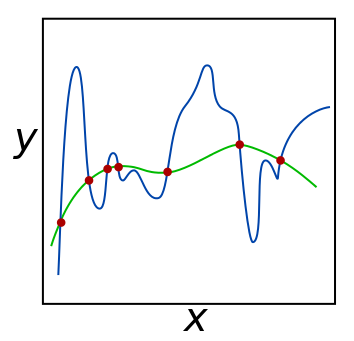

<br>
To regularize, add a regularization term (regularizer) to the loss function.

$min\sum_{i=1}^{n}Cost(h_\theta(x_i), y_i ) + \lambda R(h_\theta)$

Where: <br>
$R(h_\theta)$ is the reqularization term / regularizer <br>
$\lambda$ is a paramater of how important the regularization term is <br>

To understand more about regularization:
1. https://www.coursera.org/learn/machine-learning/lecture/4VDlf/regularization-and-bias-variance
2. https://en.wikipedia.org/wiki/Regularization_(mathematics)
3. https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a
<br>

Note that there are 2 most common regularizer, which are Ridge Regression (a.k.a. L2 norm) and Lasso (a.k.a. L1 norm).

We will try to use both and compare them with previou method

##**I. Using Ridge Regression**

Since the dataset is the same, we don't need to prepare the dataset first

In [ ]:
from sklearn.linear_model import LogisticRegression
# set penalty = l2 to enable 
classifier = LogisticRegression(penalty = 'l2', solver = "lbfgs", C=0.03)
classifier.fit(X_train,Y_train)


Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)


print("Confusion matrix:\n",cm)
print("accuracy:" ,accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:", f1)

Confusion matrix:
 [[100   7]
 [ 19  28]]
accuracy: 0.8311688311688312
precision: 0.8
recall: 0.5957446808510638
f1: 0.6829268292682927


##**II. Using Lasso**

Since the dataset is the same, we don't need to prepare the dataset first

In [ ]:
from sklearn.linear_model import LogisticRegression
# set penalty = l2 to enable 
classifier = LogisticRegression(penalty = 'l1', solver = "saga", C=0.03)
classifier.fit(X_train,Y_train)


Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
cm = confusion_matrix(Y_test,Y_pred)
accuracy = accuracy_score(Y_test,Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)


print("Confusion matrix:\n",cm)
print("accuracy:" ,accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:", f1)


Confusion matrix:
 [[97 10]
 [23 24]]
accuracy: 0.7857142857142857
precision: 0.7058823529411765
recall: 0.5106382978723404
f1: 0.5925925925925926


#**Result and Conclusion**

the accuracy is improved using ridge regression regularization. However, the accuracy decreased by using lasso. <br>

**In conclusion, regularization could improve the performance of our model**. However, the hardest part is finding the optimal $\lambda$, if the $\lambda$ is too big, then the regularizer will dominate the cost function. On the other hand, if the $\lambda$ is too small, the regularizer won't be significant.

**So, regularization can improve the model if the $\lambda$ is optimal.**